# ----------   BoomBikes_Linear_Regression   -------------

## Step-1: Data readiblity/Understanding

In [838]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [839]:
bike = pd.read_csv("C:\\Users\\amita\\Downloads\\boombike_data_pd.read_csv_jupyter\\bike_sharing_data.csv")
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [840]:
bike.shape

(730, 16)

In [841]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [842]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [843]:
# checking missing value:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### insights:
    we don't have missing values in dataset.

### Rename the columns name: 

In [844]:
# use '.rename' function:
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()

instant      dteday  season  Year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        6           0   
1        2  02-01-2018       1     0      1        0        0           0   
2        3  03-01-2018       1     0      1        0        1           1   
3        4  04-01-2018       1     0      1        0        2           1   
4        5  05-01-2018       1     0      1        0        3           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

   count  
0    985  
1    801  
2   1349  
3   1562  
4   1600

### Mapping Variables for season, month, weathersit,weekday

In [845]:
# as in these coloums dtype is int, convert it into string form:
# for that will use 'mapping':
bike['season'] = bike.season.map({1:'spring',
                                 2:'summer',
                                 3:'fall',
                                 4:'winter'})
bike['month'] = bike.month.map({1:'Jan', 2:'Feb', 3:'March', 4:'April',
                                 5:'May', 6:'June', 7:'July', 8:'Aug',
                                 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike['weathersit'] = bike.weathersit.map({1:'Clear', 2:'Mist + Cloudy',
                                         3:'light_snow', 4:'Snow + fog'})
bike['weekday'] = bike.weekday.map({0:'Sunday', 1:'Monday', 2:'Tuesday',
                                   3:'Wednesday', 4:'Thursday',
                                   5:'Friday', 6:'Saturday'})
bike.head()

instant      dteday  season  Year month  holiday    weekday  workingday  \
0        1  01-01-2018  spring     0   Jan        0   Saturday           0   
1        2  02-01-2018  spring     0   Jan        0     Sunday           0   
2        3  03-01-2018  spring     0   Jan        0     Monday           1   
3        4  04-01-2018  spring     0   Jan        0    Tuesday           1   
4        5  05-01-2018  spring     0   Jan        0  Wednesday           1   

      weathersit       temp     atemp  humidity  windspeed  casual  \
0  Mist + Cloudy  14.110847  18.18125   80.5833  10.749882     331   
1  Mist + Cloudy  14.902598  17.68695   69.6087  16.652113     131   
2          Clear   8.050924   9.47025   43.7273  16.636703     120   
3          Clear   8.200000  10.60610   59.0435  10.739832     108   
4          Clear   9.305237  11.46350   43.6957  12.522300      82   

   registered  count  
0         654    985  
1         670    801  
2        1229   1349  
3        1454   1562  
4        1518   1600

## Step-2: Data Visualisations:

In [846]:
# check unique values:
# use 'nunique' nd for srting : use '.sort_values()' function:
bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

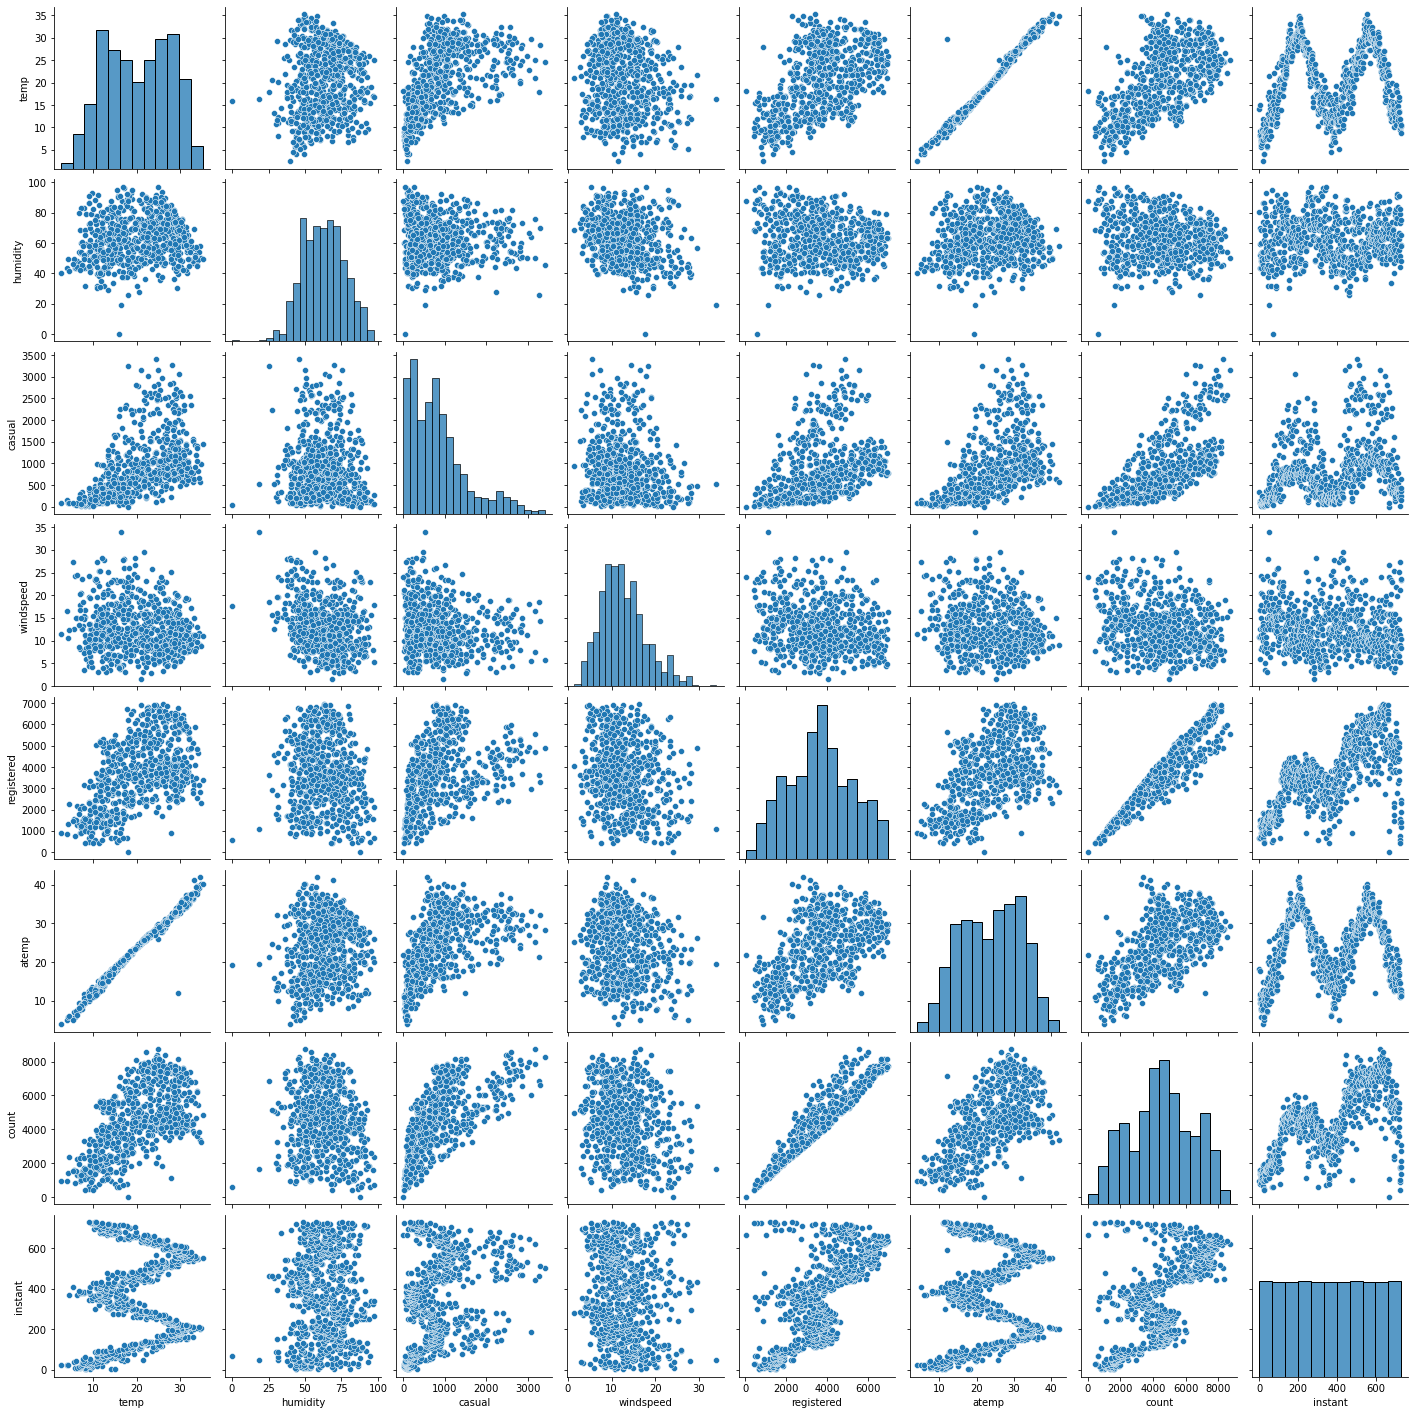

In [847]:
# will use 'Pairplot':
sns.pairplot(bike, vars=['temp', 'humidity', 'casual','windspeed','registered',
                          'atemp','count','instant'])
plt.show()

##### Insights:
    as, we can see in the plots, Bike rentals are more correlated to temperature. 

### Now, Categorical Variables:

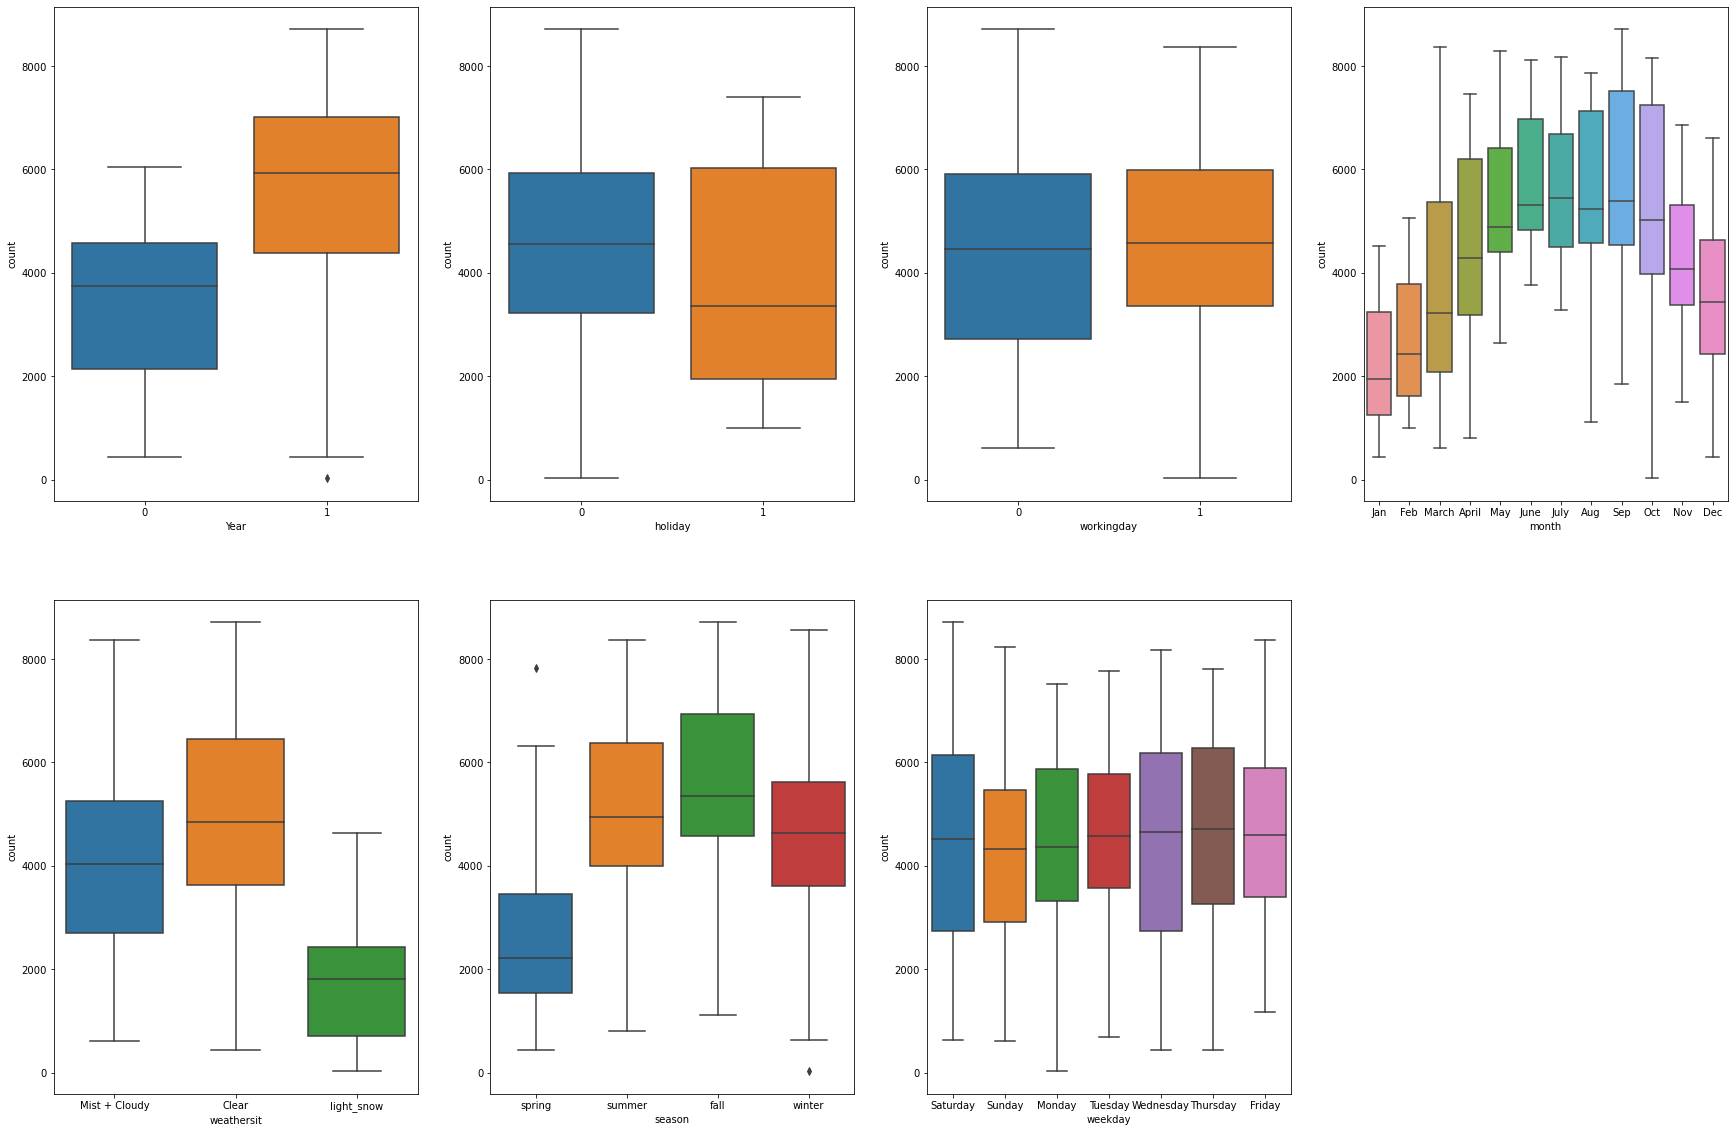

In [848]:
# for categorical variable will try to use 'boxplot':
# as we are using multiple variable will use 'subplot'

plt.figure(figsize=(30, 20))

plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike)

plt.show()

##### Insights:
    1. bike counts are higher in the year 2019 compared to 2018.
    2. as per plot of weekday, rental are higher on wednesday, thursday and saturday.
    3. bike counts are more during fall season and summer.
    4. counts are much more higher when weather is clear.
insights shows the relationship between categorical variable and a Target variable.

### Univariate Analysis (barplot)

### 1: Year

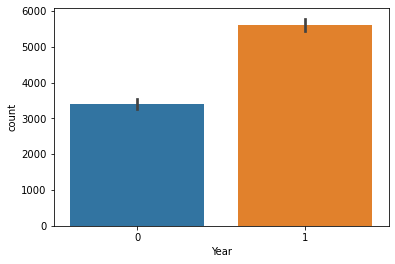

In [849]:
# bike rental count in 2018 and 2019 :
sns.barplot(x='Year', y='count', data=bike)
plt.show()

##### Insights:
    as per plot in 2019 bike counts are higher than 2018.

### Months:

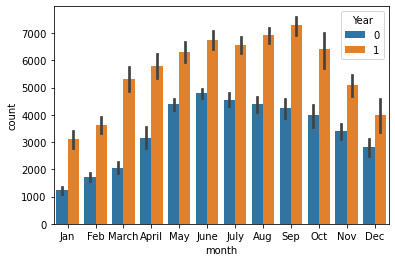

In [850]:
# relation between months and years:
sns.barplot(x='month', y='count', hue='Year', data=bike)
plt.show()

##### Insights:
    so here, in the month of sep, 2019 bike counts are higher.
    or we can say that in the year 2019 counts are higher compared to 2018.

### Season

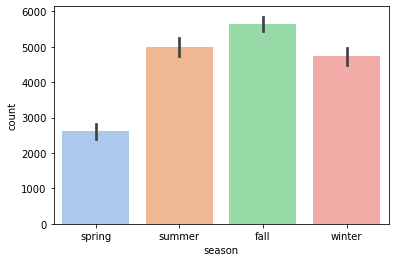

In [851]:
# Relation between seasons:
sns.barplot(x='season', y='count', data=bike, palette="pastel")
plt.show()

##### insights:
    during fall season counts of bike are high.

### Weathersit

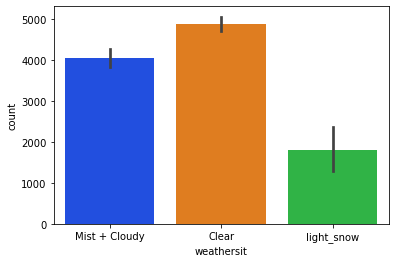

In [852]:
sns.barplot(x='weathersit', y='count', data=bike, palette="bright")
plt.show()

##### Insights:
    counts are high when weather is clear.

### Univariate Analysis(Scatter Plot)

### Temperature:

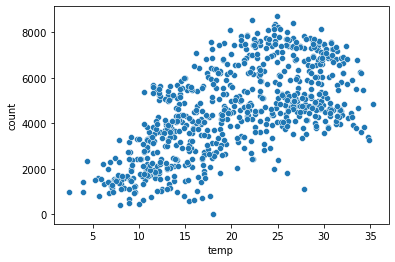

In [853]:
# for temperature will use 'Scatter plot':
sns.scatterplot(x='temp', y= 'count', data=bike)
plt.show()

##### Insights:
    Count of bike is higher when temperature is mostly between 20 to 35 deg. cel. 
    means bike counts are high when weather is clear.

### Humidity:

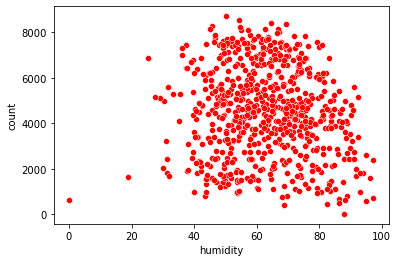

In [854]:
sns.scatterplot(x='humidity', y= 'count', data=bike, color="red")
plt.show()

##### when humidity is between 60% to 100% people prefer bikes more.

### Heatmap:

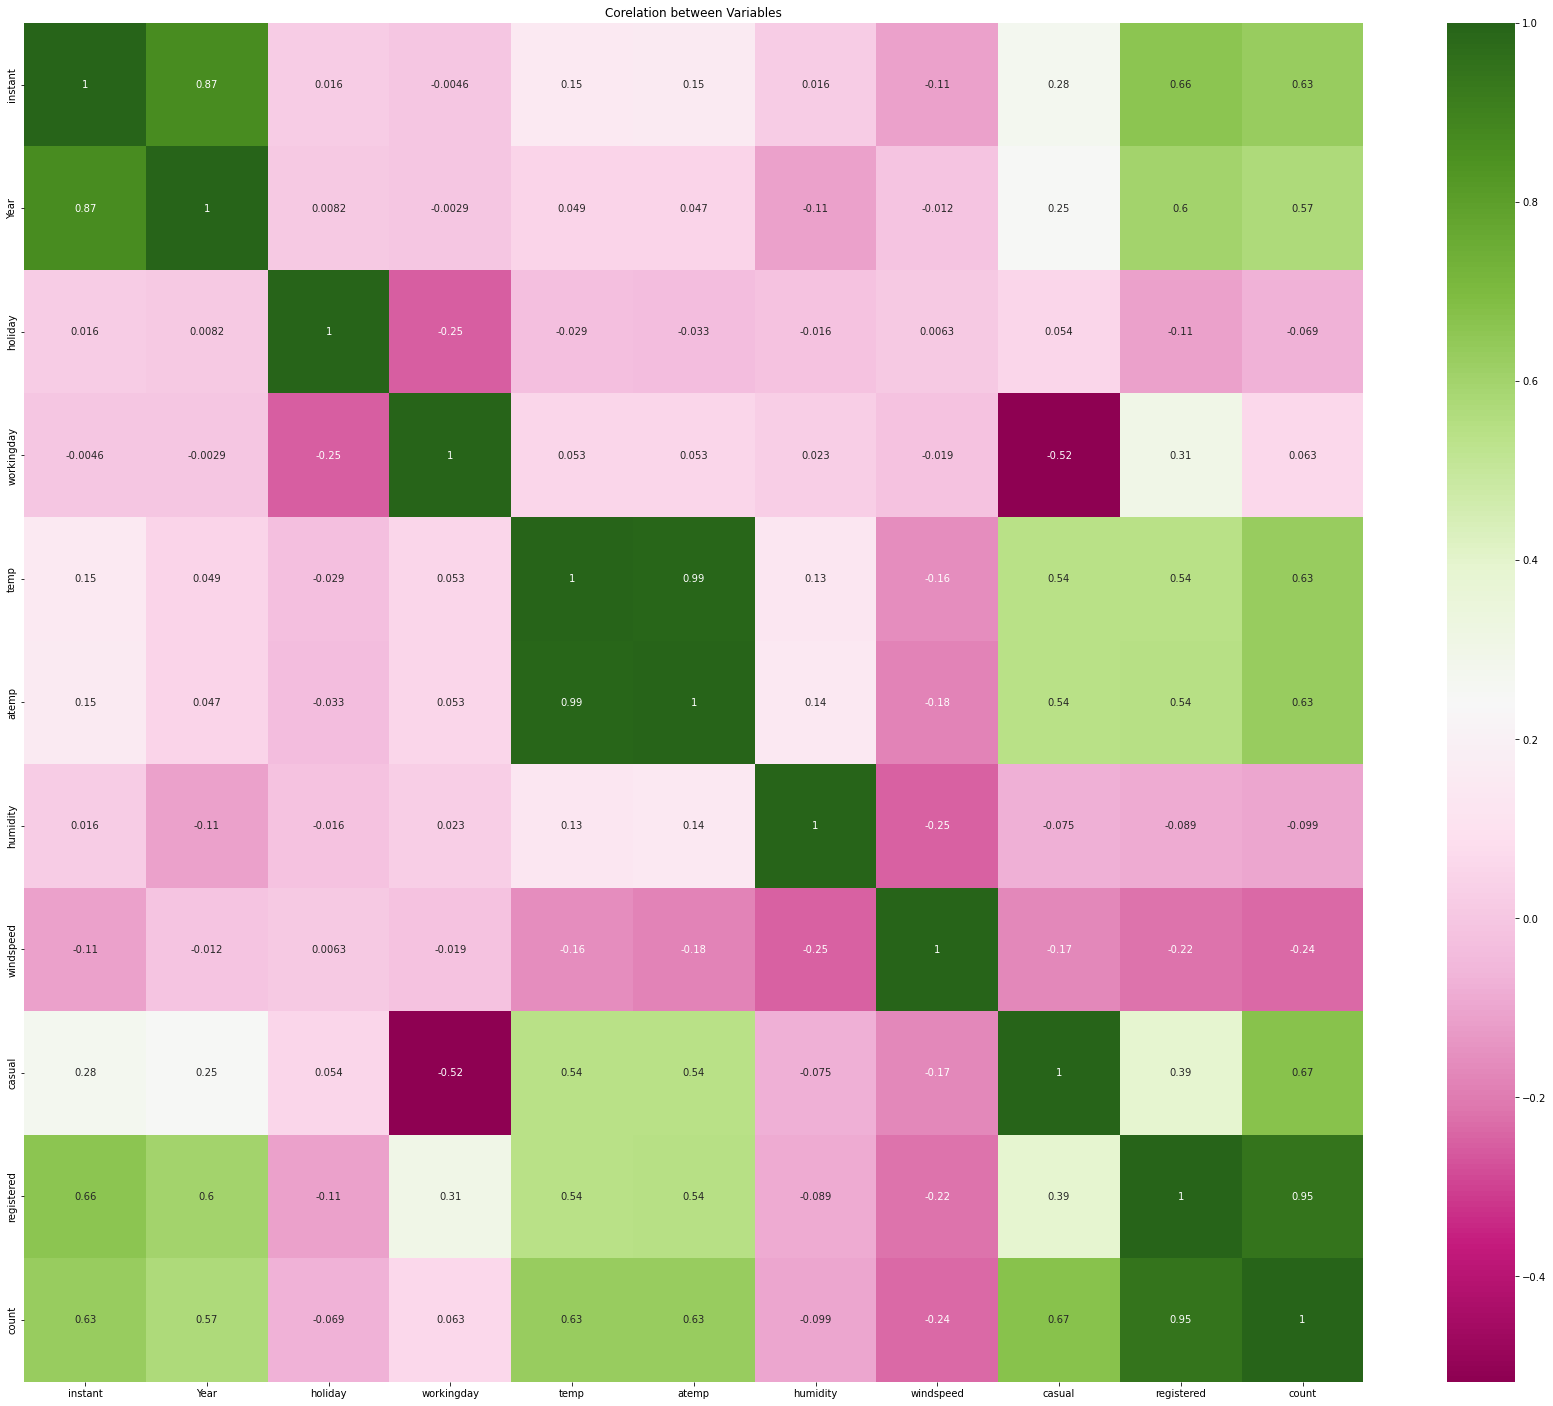

In [855]:
# now check corelations between variables:
plt.figure(figsize=(30,25))
sns.heatmap(bike.corr(), cmap = 'PiYG', annot = True)
plt.title("Corelation between Variables")
plt.show()

##### Insights:
    as we can see, temp, atemp, casual, instant variables are corelated to count.
    here,temp is highly corelation wsith count.

### Data Cleanning:

##### here,many colums are unnecessary,
so, will drop it.

In [856]:
# check dataframe first:
bike.head(3)

instant      dteday  season  Year month  holiday   weekday  workingday  \
0        1  01-01-2018  spring     0   Jan        0  Saturday           0   
1        2  02-01-2018  spring     0   Jan        0    Sunday           0   
2        3  03-01-2018  spring     0   Jan        0    Monday           1   

      weathersit       temp     atemp  humidity  windspeed  casual  \
0  Mist + Cloudy  14.110847  18.18125   80.5833  10.749882     331   
1  Mist + Cloudy  14.902598  17.68695   69.6087  16.652113     131   
2          Clear   8.050924   9.47025   43.7273  16.636703     120   

   registered  count  
0         654    985  
1         670    801  
2        1229   1349

In [857]:
# here, instant,dteday,atemp,casual,registered columns are unnecessary,
# will drop it:
bike=bike.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike.head()

season  Year month  holiday    weekday  workingday     weathersit  \
0  spring     0   Jan        0   Saturday           0  Mist + Cloudy   
1  spring     0   Jan        0     Sunday           0  Mist + Cloudy   
2  spring     0   Jan        0     Monday           1          Clear   
3  spring     0   Jan        0    Tuesday           1          Clear   
4  spring     0   Jan        0  Wednesday           1          Clear   

        temp  humidity  windspeed  count  
0  14.110847   80.5833  10.749882    985  
1  14.902598   69.6087  16.652113    801  
2   8.050924   43.7273  16.636703   1349  
3   8.200000   59.0435  10.739832   1562  
4   9.305237   43.6957  12.522300   1600

In [858]:
# check datatype:
bike.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

## Step-3: Data Preparation

##### Create Dummy dataset for season, months, weekday, weathersit as their data type is 'object':
    

In [859]:
# for dummy data use 'pd.get_dummies' function:

months=pd.get_dummies(bike.month,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)


In [860]:
# now concat the results in the original dataframe:
# use 'pd.concat' function:

bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

Aug  Dec  Feb  Jan  July  June  March  May  Nov  Oct  ...  Year  month  \
0    0    0    0    1     0     0      0    0    0    0  ...     0    Jan   
1    0    0    0    1     0     0      0    0    0    0  ...     0    Jan   
2    0    0    0    1     0     0      0    0    0    0  ...     0    Jan   
3    0    0    0    1     0     0      0    0    0    0  ...     0    Jan   
4    0    0    0    1     0     0      0    0    0    0  ...     0    Jan   

   holiday    weekday  workingday     weathersit       temp  humidity  \
0        0   Saturday           0  Mist + Cloudy  14.110847   80.5833   
1        0     Sunday           0  Mist + Cloudy  14.902598   69.6087   
2        0     Monday           1          Clear   8.050924   43.7273   
3        0    Tuesday           1          Clear   8.200000   59.0435   
4        0  Wednesday           1          Clear   9.305237   43.6957   

   windspeed  count  
0  10.749882    985  
1  16.652113    801  
2  16.636703   1349  
3  10.739832   1562  
4  12.522300   1600  

[5 rows x 33 columns]

In [861]:
# checking all columns name:
bike.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov',
       'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Mist + Cloudy', 'light_snow', 'spring', 'summer',
       'winter', 'season', 'Year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [862]:
# drop season, month, weekday, weathersit columns:

bike.drop(['season', 'month', 'weekday', 'weathersit'], axis=1, inplace=True)
bike.head(3)

Aug  Dec  Feb  Jan  July  June  March  May  Nov  Oct  ...  spring  summer  \
0    0    0    0    1     0     0      0    0    0    0  ...       1       0   
1    0    0    0    1     0     0      0    0    0    0  ...       1       0   
2    0    0    0    1     0     0      0    0    0    0  ...       1       0   

   winter  Year  holiday  workingday       temp  humidity  windspeed  count  
0       0     0        0           0  14.110847   80.5833  10.749882    985  
1       0     0        0           0  14.902598   69.6087  16.652113    801  
2       0     0        0           1   8.050924   43.7273  16.636703   1349  

[3 rows x 29 columns]

In [863]:
# checking columns name again:
bike.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov',
       'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Mist + Cloudy', 'light_snow', 'spring', 'summer',
       'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed', 'count'],
      dtype='object')

In [864]:
# check no. of rows and columns:
bike.shape

(730, 29)

##### after Cleanning the data check again correlation between variables.
again will use 'heatmap':


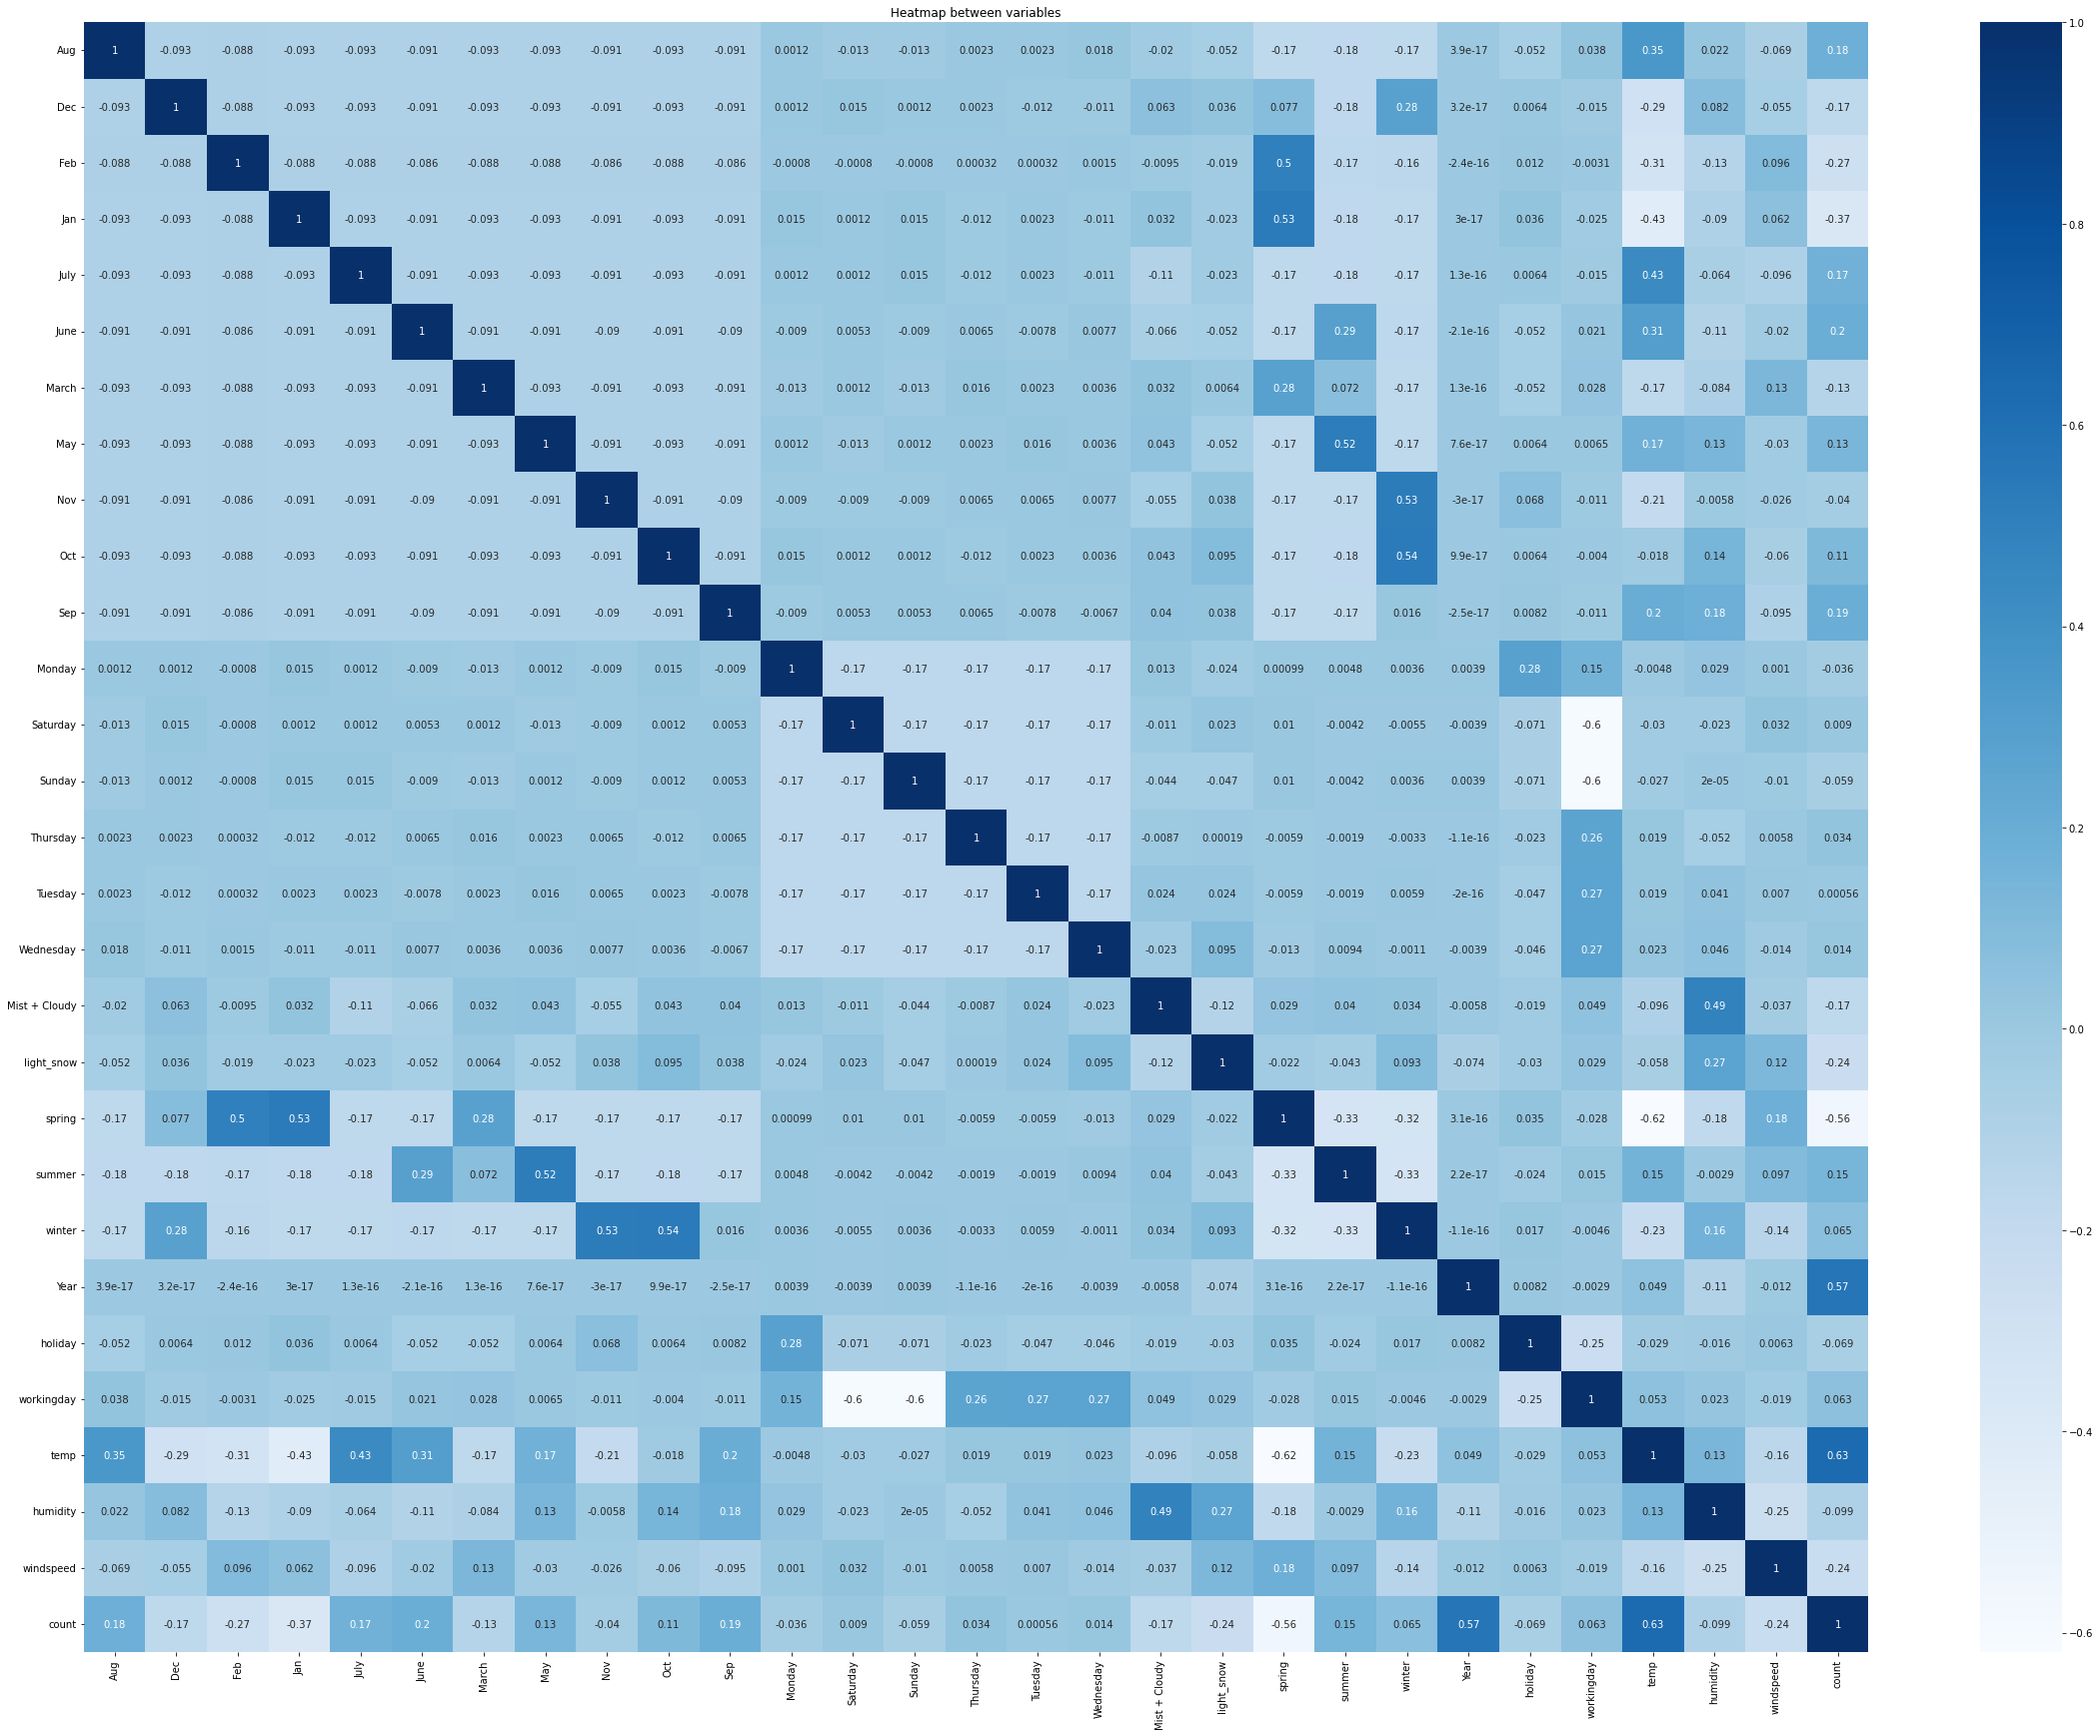

In [865]:
plt.figure(figsize=(40,30))
sns.heatmap(bike.corr(), cmap = 'Blues', annot = True)
plt.title("Heatmap between variables")
plt.show()

##### Insights:
    in months: June to October, Summer season are in good corelation with the 'count'.
        that means in Summer season and Between june to October when weather is clear or mist-cloudy people are prefering to rental bikes.

## Step-4: Splitting the data into 'Training' and 'Testing':

###### In ML we will split the dataset in to 70-30% ration. 
70% data for Training and 30% dataset for Testing purpose.
for that will use 'sklearn'

In [866]:
# import 'sklearn':

from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=100)


In [867]:
# rows and columns size after spliting into train and test data:

print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features:

##### There are 2 common ways for rescaling:
    1. Min-Max scaling called "Normalisation": Between 0 and 1.
    2. standardisation: mean: 0, sigma: 1.

### Normalisation: Min-max Scaling

In [868]:
# import library:
from sklearn.preprocessing import MinMaxScaler

In [869]:
# Instantiate an Object:
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

C:\Users\amita\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Aug  Dec  Feb  Jan  July  June  March  May  Nov  Oct  ...  spring  \
576    0    0    0    0     1     0      0    0    0    0  ...       0   
426    0    0    0    0     0     0      1    0    0    0  ...       1   
728    0    1    0    0     0     0      0    0    0    0  ...       1   
482    0    0    0    0     0     0      0    0    0    0  ...       0   
111    0    0    0    0     0     0      0    0    0    0  ...       0   

     summer  winter  Year  holiday  workingday      temp  humidity  windspeed  \
576       0       0     1        0           1  0.815169  0.725633   0.264686   
426       0       0     1        0           0  0.442393  0.640189   0.255342   
728       0       0     1        0           0  0.245101  0.498067   0.663106   
482       1       0     1        0           0  0.395666  0.504508   0.188475   
111       1       0     0        0           1  0.345824  0.751824   0.380981   

        count  
576  0.827658  
426  0.465255  
728  0.204096  
482  0.482973  
111  0.191095  

[5 rows x 29 columns]

In [870]:
# checking numeric variables (min & max) after scaling:
bike_train.describe()

Aug         Dec         Feb         Jan        July        June  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.096078    0.084314    0.066667    0.088235    0.076471    0.076471   
std      0.294988    0.278131    0.249689    0.283915    0.266010    0.266010   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            March         May         Nov         Oct  ...      spring  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.098039    0.084314    0.086275    0.084314  ...    0.243137   
std      0.297660    0.278131    0.281045    0.278131  ...    0.429398   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

           summer      winter        Year     holiday  workingday        temp  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.247059    0.247059    0.507843    0.025490    0.676471    0.537440   
std      0.431725    0.431725    0.500429    0.157763    0.468282    0.225858   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.339853   
50%      0.000000    0.000000    1.000000    0.000000    1.000000    0.542596   
75%      0.000000    0.000000    1.000000    0.000000    1.000000    0.735215   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         humidity   windspeed       count  
count  510.000000  510.000000  510.000000  
mean     0.650480    0.320883    0.513499  
std      0.145846    0.169803    0.224421  
min      0.000000    0.000000    0.000000  
25%      0.538643    0.199179    0.356420  
50%      0.653714    0.296763    0.518638  
75%      0.754830    0.414447    0.684710  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

##### here, all the numeric values are mapped between 0 to 1.
'Multicollinearity': Predictors are not related with each others, if there is corelation among the predictors.

##### checking correlation between variables after rescaling:

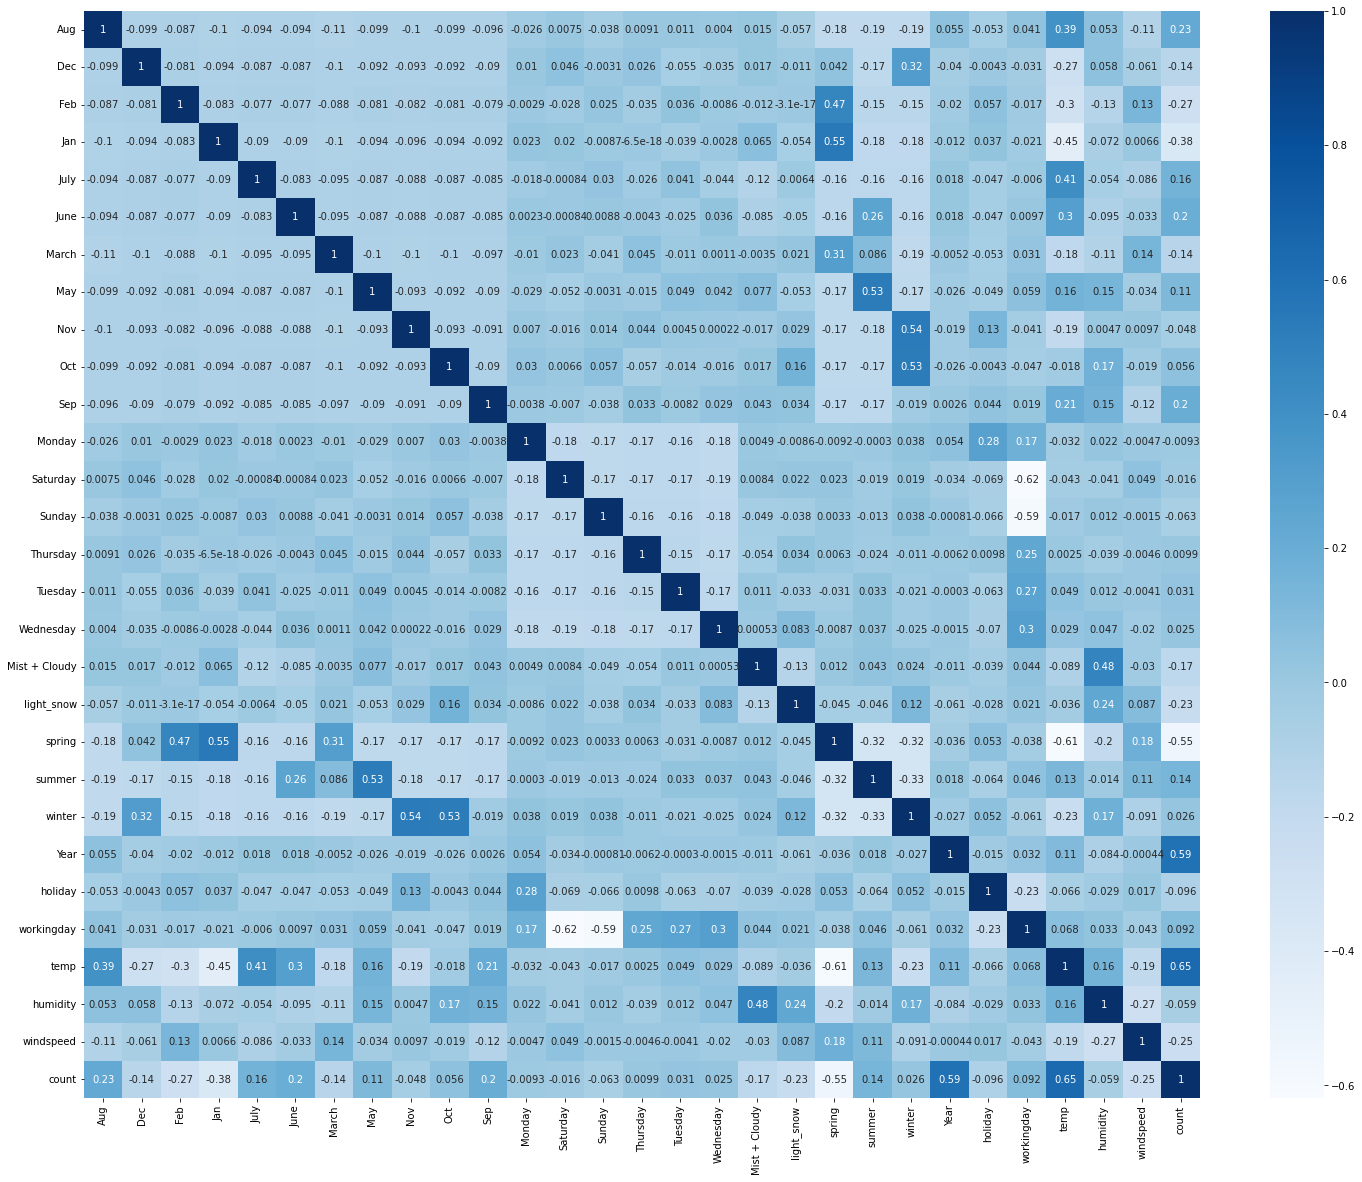

In [871]:
# little to no multicolinearity among predictors:

plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='Blues',annot = True)
plt.show()

##### looking from the heatmap- after scaling, temp, Year is correlated to the 'count' variable. and also in august, September months counts are little high, if we notice.

### X (independent value) & y (dependent value) sets for the model building:

In [872]:
y_train = bike_train.pop('count')
X_train = bike_train

## Step-5: Building a 'Linear Model'

##### will use 'LinearRegression' function from 'Scikit Learn' for its compatiblity.

### RFE:(Recursive Feature Elimination)
the 'coefficients' of a linear model, the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

In [873]:
# import library:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [874]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\amita\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [875]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 2),
 ('Dec', False, 8),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 3),
 ('March', False, 14),
 ('May', False, 9),
 ('Nov', False, 6),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Monday', False, 5),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('Mist + Cloudy', True, 1),
 ('light_snow', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', False, 12),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [876]:
# columns where RFE support is True:
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'July', 'Oct', 'Sep', 'Saturday', 'Sunday', 'Mist + Cloudy',
       'light_snow', 'spring', 'Year', 'holiday', 'workingday', 'temp',
       'humidity', 'windspeed'],
      dtype='object')

In [877]:
# Columns where RFE support is False:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'March', 'May', 'Nov', 'Monday',
       'Thursday', 'Tuesday', 'Wednesday', 'summer', 'winter'],
      dtype='object')

### Build Model using 'statsmodel':

In [878]:
# now create X_test dataframe with RFE selected variables:
# make a new col ' X_train_rfe':
X_train_rfe = X_train[col]


In [879]:
# adding constant variable:
# import 'statsmodels.api':

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\amita\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [880]:
# run the linear model:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [881]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.3
Date:                Thu, 07 Apr 2022   Prob (F-statistic):          8.67e-190
Time:                        12:10:49   Log-Likelihood:                 513.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     495   BIC:                            -934.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2876      0.024     12.140

##### Insights:
    here, R-squared:0.845,
    but also giving the notes: there are strong multicollinearity problems
    

### Checking VIF: (Variance Inflation Factor)

#### It gives a basic quantitative idea about how much feature variable are correlated with each others. it is extremely important feature to test linear model.

#### Formula of VIF:

## VIFi = 1/ 1-(Ri)**2

In [882]:
# Drop the constant values:

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [883]:
# Calculating VIFs for new model:

# import library for VIF:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
11     workingday  36.54
4        Saturday   8.91
5          Sunday   8.69
10        holiday   2.33
12           temp   2.20
8          spring   2.01
13       humidity   1.85
6   Mist + Cloudy   1.55
0             Jan   1.52
1            July   1.31
7      light_snow   1.26
14      windspeed   1.18
3             Sep   1.13
2             Oct   1.12
9            Year   1.03

In [884]:
# drop January:
X_train_new1 = X_train_rfe.drop(['Jan'], axis = 1)

In [885]:
# build a model:
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train, X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 07 Apr 2022   Prob (F-statistic):          3.51e-189
Time:                        12:10:49   Log-Likelihood:                 509.54
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     496   BIC:                            -931.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2807      0.024     11.823

C:\Users\amita\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##### in this chart we have r-square is 0.842, and still there are problem in multicollinearity.

In [886]:
# Drop the constant term :
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [887]:
# Calculate the VIFs for the new model:
vif = pd.DataFrame()
X = X_train_new1
# adding new column called : 'Features'
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values (by = 'VIF', ascending = False)
vif

Features    VIF
10     workingday  36.15
3        Saturday   8.82
4          Sunday   8.61
9         holiday   2.31
11           temp   2.11
12       humidity   1.85
7          spring   1.72
5   Mist + Cloudy   1.54
0            July   1.30
6      light_snow   1.26
13      windspeed   1.17
2             Sep   1.13
1             Oct   1.12
8            Year   1.03

##### 'humidity' variable can be dropped looking from the VIF's table.

#### Rebuilding the model without 'humidity':

In [888]:
# dropping 'humidity':
X_train_new2 = X_train_lm1.drop(['humidity'], axis = 1)

In [889]:
# Build a model:
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train, X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.0
Date:                Thu, 07 Apr 2022   Prob (F-statistic):          1.54e-187
Time:                        12:10:49   Log-Likelihood:                 502.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     497   BIC:                            -924.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2151      0.016     13.782

C:\Users\amita\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [890]:
#Drop the constant:

X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [891]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
10     workingday  15.00
3        Saturday   4.14
4          Sunday   3.84
11           temp   2.05
7          spring   1.72
9         holiday   1.48
0            July   1.29
2             Sep   1.12
1             Oct   1.11
6      light_snow   1.07
12      windspeed   1.07
5   Mist + Cloudy   1.05
8            Year   1.02

##### Now, 'holiday' can be dropped as it's insignificant looking high in VIF.

#### Rebuild the model without 'holiday':

In [892]:
# drop the holiday column:
X_train_new3 = X_train_lm2.drop(['holiday'], axis = 1)

In [893]:
# Add a constant variable:
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train, X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.0
Date:                Thu, 07 Apr 2022   Prob (F-statistic):          1.54e-187
Time:                        12:10:49   Log-Likelihood:                 502.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     497   BIC:                            -924.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2038      0.031      6.601

C:\Users\amita\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [894]:
# Drop constant variable:
X_train_lm3 = X_train_lm3.drop(['const'], axis = 1)

In [895]:
# calculate the VIF table for new model:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features    VIF
10           temp  10.82
9      workingday  10.57
11      windspeed   4.48
3        Saturday   3.14
4          Sunday   2.94
8            Year   2.06
7          spring   1.98
5   Mist + Cloudy   1.58
0            July   1.38
2             Sep   1.22
1             Oct   1.19
6      light_snow   1.10

##### will drop 'windspeed' variable.

In [896]:
# drop 'windspeed':
X_train_new4 = X_train_lm3.drop(['windspeed'], axis=1)

In [897]:
# build a model:
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train, X_train_lm4).fit()
print(lm4.summary())

C:\Users\amita\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.7
Date:                Thu, 07 Apr 2022   Prob (F-statistic):          4.94e-181
Time:                        12:10:49   Log-Likelihood:                 484.62
No. Observations:                 510   AIC:                            -945.2
Df Residuals:                     498   BIC:                            -894.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1499      0.031      4.895

In [898]:
# drop constant:
X_train_lm4 = X_train_lm4.drop(['const'], axis=1)

In [899]:
# Calculate the VIF:
vif = pd.DataFrame()
x = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
10           temp  10.82
9      workingday  10.57
11      windspeed   4.48
3        Saturday   3.14
4          Sunday   2.94
8            Year   2.06
7          spring   1.98
5   Mist + Cloudy   1.58
0            July   1.38
2             Sep   1.22
1             Oct   1.19
6      light_snow   1.10

##### July column, we should drop

#### BUild a model without 'July'

In [900]:
# drop 'July'
X_train_new5 = X_train_lm4.drop(['July'], axis=1)

In [901]:
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train, X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.0
Date:                Thu, 07 Apr 2022   Prob (F-statistic):          1.07e-179
Time:                        12:10:49   Log-Likelihood:                 478.64
No. Observations:                 510   AIC:                            -935.3
Df Residuals:                     499   BIC:                            -888.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1650      0.031      5.386

C:\Users\amita\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [902]:
# drop constant:
X_train_lm6 = X_train_lm5.drop(['const'], axis = 1)

In [903]:
# calculate the vifs for the new model:
vif =pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features   VIF
9           temp  9.12
8     workingday  8.85
2       Saturday  2.70
3         Sunday  2.58
7           Year  2.05
6         spring  1.89
4  Mist + Cloudy  1.57
0            Oct  1.18
1            Sep  1.16
5     light_snow  1.09

##### Finally VIFs and p-value both are within an acceptable range.
    - The p-value for each terms test the null hypothesis that, the coefficient is equal to zero(no effect).A low p-value (<0.05) indicates that we can reject the null hypothesis.
    - A thumb rule: if a VIF>10, you have high multicollinearity. In this case, we are in good shape as our VIF values are not more than 10.
    - R-squared measures the strength of the relationship between model and the dependent variable on a convinient 0-100% scale. And here, R-square value is 0.826 or 82.6%.
    - Adj. R-squared value is 0.822 or 82.2%.
    


##### So, we drop off January, windspeed, holiday, july and humidity variables from the RFE support columns. 

## Step-6: Residual Analysis of the train data:

### Assumptions of Linear Regression.

In [904]:
# check last rebuiled model's dataset: which is 'lm5': 
# for X train data:
X_train_lm5

const  Oct  Sep  Saturday  Sunday  Mist + Cloudy  light_snow  spring  \
576    1.0    0    0         0       0              0           0       0   
426    1.0    0    0         1       0              1           0       1   
728    1.0    0    0         0       1              0           0       1   
482    1.0    0    0         1       0              1           0       0   
111    1.0    0    0         0       0              1           0       0   
..     ...  ...  ...       ...     ...            ...         ...     ...   
578    1.0    0    0         0       0              0           0       0   
53     1.0    0    0         0       0              0           0       1   
350    1.0    0    0         1       0              1           0       0   
79     1.0    0    0         0       0              1           0       0   
520    1.0    0    0         0       0              1           0       0   

     Year  workingday      temp  
576     1           1  0.815169  
426     1           0  0.442393  
728     1           0  0.245101  
482     1           0  0.395666  
111     0           1  0.345824  
..    ...         ...       ...  
578     1           1  0.863973  
53      0           1  0.202618  
350     0           0  0.248216  
79      0           1  0.462664  
520     1           1  0.600225  

[510 rows x 11 columns]

In [905]:
# y train predicted:
y_train_predict = lm5.predict(X_train_lm5)

In [906]:
# import libraries for plots:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\amita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

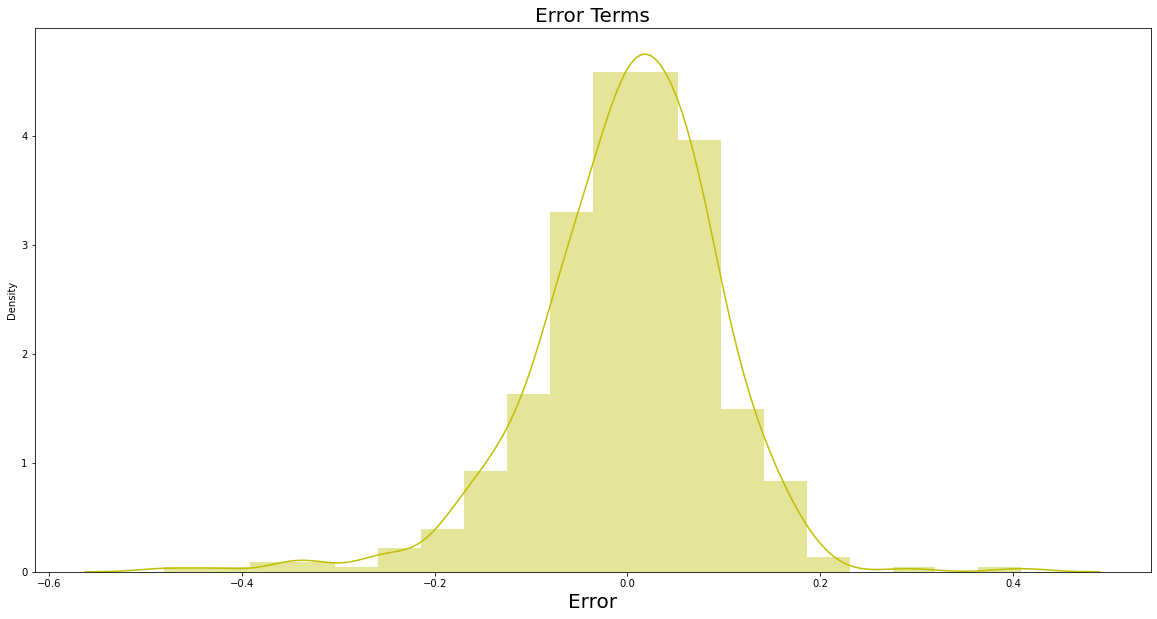

In [907]:
# create 'histogram' for the error terms:

fig = plt.figure()

plt.figure(figsize=(20,10))
sns.distplot((y_train - y_train_predict), bins = 20, color='y')

plt.title('Error Terms', fontsize = 20)
plt.xlabel('Error', fontsize=20)
plt.show()


## Step-7: Making Predictions

### Apply the scaling on the test sets:

In [908]:
# create a list of numerical variables:
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

C:\Users\amita\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Aug  Dec  Feb  Jan  July  June  March  May  Nov  Oct  ...  spring  \
184    0    0    0    0     1     0      0    0    0    0  ...       0   
535    0    0    0    0     0     1      0    0    0    0  ...       0   
299    0    0    0    0     0     0      0    0    0    1  ...       0   
221    1    0    0    0     0     0      0    0    0    0  ...       0   
152    0    0    0    0     0     1      0    0    0    0  ...       0   

     summer  winter  Year  holiday  workingday      temp  humidity  windspeed  \
184       0       0     0        1           0  0.831783  0.657364   0.084219   
535       1       0     1        0           1  0.901354  0.610133   0.153728   
299       0       1     0        0           1  0.511964  0.837699   0.334206   
221       0       0     0        0           1  0.881625  0.437098   0.339570   
152       1       0     0        0           1  0.817246  0.314298   0.537414   

        count  
184  0.692706  
535  0.712034  
299  0.303382  
221  0.547400  
152  0.569029  

[5 rows x 29 columns]

In [909]:
# Dividing into X_test and y_test:
X_test = bike_test
y_test = bike_test.pop('count')
X_test.describe()

Aug         Dec         Feb         Jan        July        June  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.059091    0.086364    0.100000    0.077273    0.104545    0.095455   
std      0.236333    0.281541    0.300684    0.267633    0.306665    0.294512   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            March         May         Nov         Oct  ...  light_snow  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.054545    0.086364    0.072727    0.086364  ...    0.027273   
std      0.227609    0.281541    0.260281    0.281541  ...    0.163248   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

           spring      summer      winter        Year     holiday  workingday  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.254545    0.263636    0.236364    0.481818    0.036364    0.700000   
std      0.436599    0.441609    0.425817    0.500809    0.187620    0.459303   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
75%      1.000000    1.000000    0.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             temp    humidity   windspeed  
count  220.000000  220.000000  220.000000  
mean     0.558718    0.638221    0.313293  
std      0.233187    0.148694    0.159584  
min      0.046591    0.261915   -0.042808  
25%      0.355429    0.529197    0.198843  
50%      0.558172    0.625590    0.300126  
75%      0.755981    0.743798    0.402718  
max      0.984424    1.002146    0.807474  

[8 rows x 28 columns]

## Check Columns:
X_train_new5.columns

In [910]:
# use model to make predictions:

# create X_test_new DataFrame by dropping variables from X_test:
X_test_new = X_test[X_train_new5.columns]

# Add constant variable:
X_test_new1 = sm.add_constant(X_test_new)
                              
X_test_new1.head()

C:\Users\amita\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const  Oct  Sep  Saturday  Sunday  Mist + Cloudy  light_snow  spring  \
184    1.0    0    0         0       0              1           0       0   
535    1.0    0    0         0       0              0           0       0   
299    1.0    1    0         0       0              1           0       0   
221    1.0    0    0         0       0              0           0       0   
152    1.0    0    0         0       0              0           0       0   

     Year  workingday      temp  
184     0           0  0.831783  
535     1           1  0.901354  
299     0           1  0.511964  
221     0           1  0.881625  
152     0           1  0.817246

In [911]:
# making predictions:
y_pred = lm5.predict(X_test_new1)

### Finding R-Squared and Adjusted R-Squared for Test set:

In [913]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8219290574402397

In [914]:
# Adjusted R-Square means: R^2



### Formula of adjusted R^2:
   

###  Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

In [915]:
# here, n=sample size, p=number of independent variables:

adj_r2 = 1-(1-0.8219290574402397)*(11-1)/(11-1-1)
print(adj_r2)

0.8021433971558218


## Step-8: Model Evaluation

Text(0, 0.5, 'y_pred')

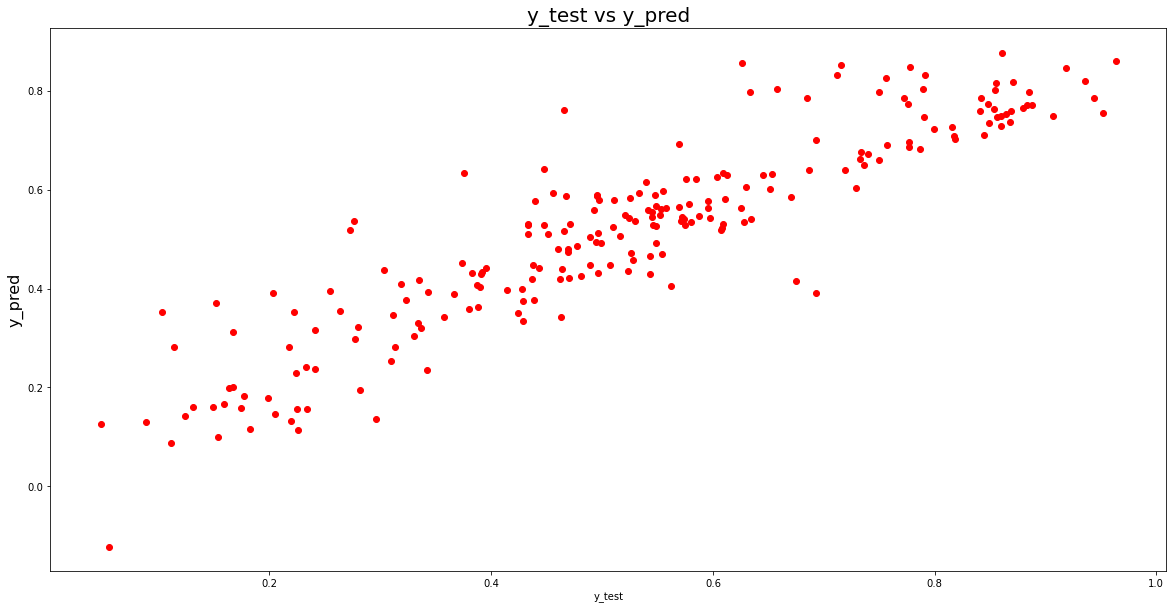

In [916]:
# create a 'scatter plot' to understand the spread.
plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color = 'red')
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=16)

### Visualising the fit on the test set:

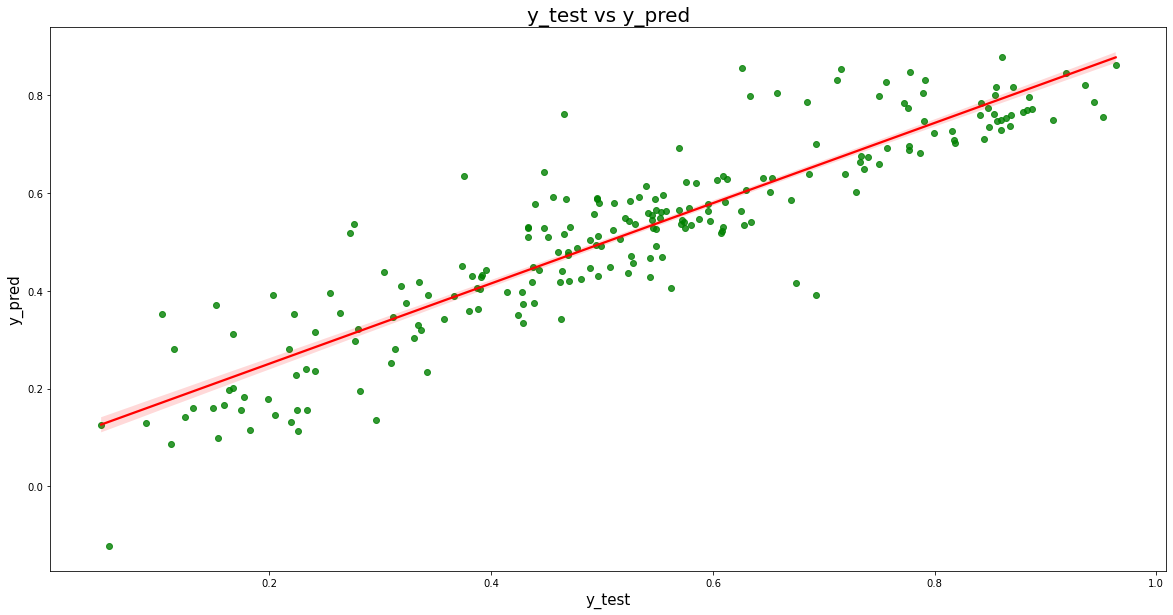

In [920]:
# Linear Regression plot:
plt.figure(figsize=(20,10))
sns.regplot(x = y_test, y = y_pred, ci=68, fit_reg=True, scatter_kws={'color':'green'}, line_kws={'color':'red'})

plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)
plt.show()

### Analysis Comparison between Train model and Test Model:

##### Insights:
1. Train: R^2 = 0.826 and adj R^2 = 0.822.
2. Test:  R^2 = 0.8219 and adj R^2 = 0.8021.
3. Difference in R^2 between train and test:1.5%
4. Difference in adjusted R^2 between train and test:3.15%

    if R^2 is less than 5%, we can conclude that it is the best model.

##### Diving into Final Analysis:
- here, temperature variable is having the highest coefficient that is 0.3680, which means if the temperature increases by one unit the number of bike rentals increases by 0.3680.
- there are some variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
- Mist + Cloudy: -0.0799, light_snow: -0.3135,spring: -0.1462 has a negative coefficient, which suggest as the independent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. 

## Business Gaols:

#### Conclusions:
- Temperature colud be a prime factor for making decision for the Organisation.
- Demand of bikes was higher in 2019 in the comparistion of 2018.
- Demands are high during Working Days, so, provide a graet offers to the working individuals.
